# Copia: quickstart

In [1]:
import pandas as pd

Load data:

In [2]:
df = pd.read_csv('datasets/isl.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Adónías saga (riddarasögur),"Copenhagen and Reykjavík, Arnamagnæan Collecti..."
1,Adónías saga (riddarasögur),"Copenhagen and Reykjavík, Arnamagnæan Collecti..."
2,Adónías saga (riddarasögur),"Copenhagen and Reykjavík, Arnamagnæan Collecti..."
3,Adónías saga (riddarasögur),"Copenhagen and Reykjavík, Arnamagnæan Collecti..."
4,Adónías saga (riddarasögur),"Copenhagen and Reykjavík, Arnamagnæan Collecti..."


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)

[8 2 4 3 2 4 1 1 4 8 1 3 3 3 4 1 6 3 2 1 7 3 4 4 5 2 2 3 1 2 8 3 2 1 1 1 4
 1 1 2 4 2 1 5 5 4 2 2 1 3 3 2 1 3 2 4 1 1 3 1 2 1 2 1 2 1 1 3 1 1 1 6 4 3
 5 4 9 2 2 6 3 2 2 3 5 1 2 4 2 2 1 5 2 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 2 2 1
 2 2 1 1 1 1]


In [4]:
import copia.plot as plot
#plot.species_accumulation_curve(abundance, incl_minsample=False)

In [5]:
#plot.species_accumulation_curve(abundance, incl_minsample=True)

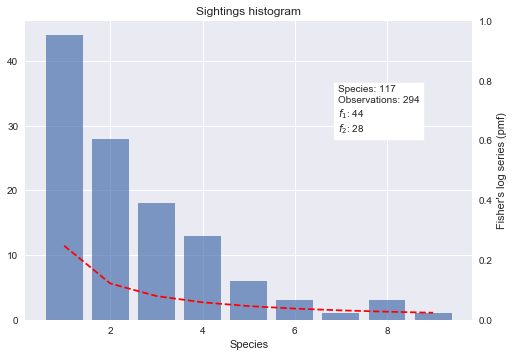

In [6]:
plot.abundance_histogram(abundance)

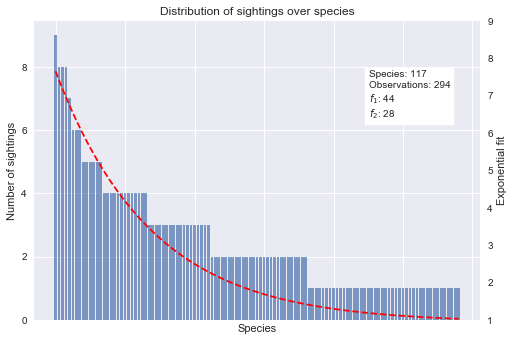

In [7]:
plot.abundance_counts(abundance)

Apply chao1:

In [8]:
from copia.richness import diversity
print('Empirical:', diversity(abundance))
print('chao1:', diversity(abundance, method='chao1'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

Empirical: 117
chao1: 151.45383867832848
Egghe & Proot: 162.3195848895986
Jackknife: 161.0


In [9]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, return_ci=True))
print(diversity(abundance, method='jackknife', return_ci=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

{'richness': 161.0, 'order': 1}
{'richness': 161.0, 'order': 1, 'lci': 142.613908076454, 'uci': 179.386091923546}
{'richness': 161.0, 'lci': 142.613908076454, 'uci': 179.386091923546}
{'richness': 161.0, 'lci': 142.613908076454, 'uci': 179.386091923546}


In [10]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

1444.835044835045
1444.835044835045
22656.882173619982
1444.835044835045


/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)
/Users/mikekestemont/GitRepos/copia/copia/richness.py:321: UserWarning: Tolerance criterion not met: 3.947834124398716e+42 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
/Users/mikekestemont/GitRepos/copia/copia/richness.py:321: UserWarning: Tolerance criterion not met: 0.01589321107462638 > 1e-10
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')


## Compare multiple assemblages

In [11]:
assemblages = {}
for lang in ('dum', 'isl', 'gle'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

100%|██████████| 1000/1000 [00:00<00:00, 69151.32it/s]


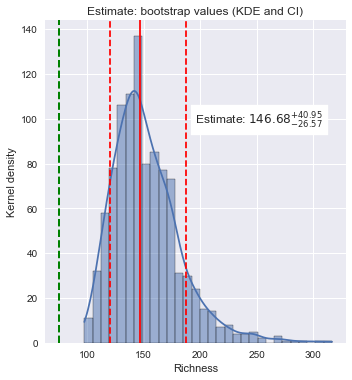

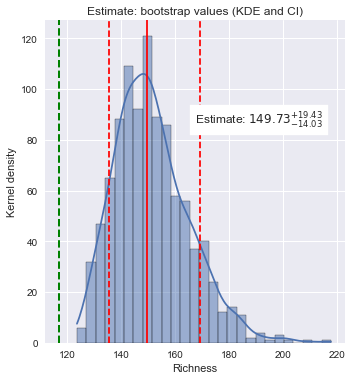

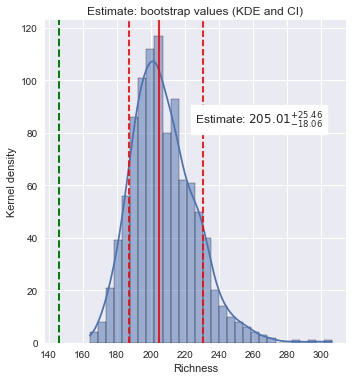

In [12]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='chao1', CI=True)
    plot.richness_density(estimate, empirical)

100%|██████████| 1000/1000 [00:00<00:00, 63954.13it/s]


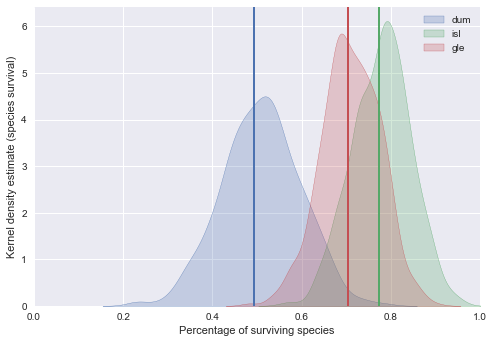

In [13]:
df = plot.survival(assemblages, method='chao1')

100%|██████████| 1000/1000 [00:27<00:00, 37.02it/s]


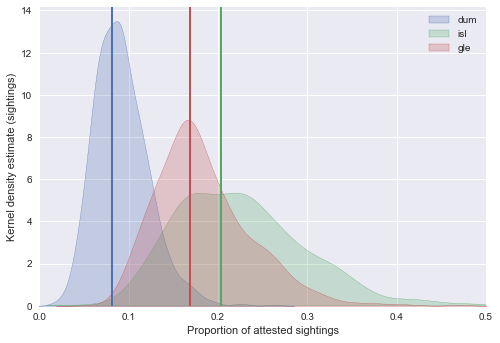

In [14]:
df = plot.survival(assemblages, method='minsample')

In [15]:
df

,Labels,minsample,minsample-lCI,minsample-uCI
0,dum,0.081553,0.162127,0.043607
1,isl,0.203483,0.384529,0.112505
2,gle,0.168987,0.304021,0.101734
